## Reducing dimensionality and clustering

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Load and process 2D arrays

In [2]:
# Define the folder containing the CSV files
input_folder = '../output/raw'

# Load all CSV files into a list of 2D arrays
arrays = []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        if 'S1' in filename:
            filepath = os.path.join(input_folder, filename)
            array = np.loadtxt(filepath, delimiter=',')
            arrays.append(array)

### Flatten and reduce dimensionality

In [12]:
# Flatten each 2D array into a 1D array
flattened_arrays = [array.flatten() for array in arrays]

# Reduce dimensionality using PCA
pca = PCA()  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)
len(reduced_data[0])

50

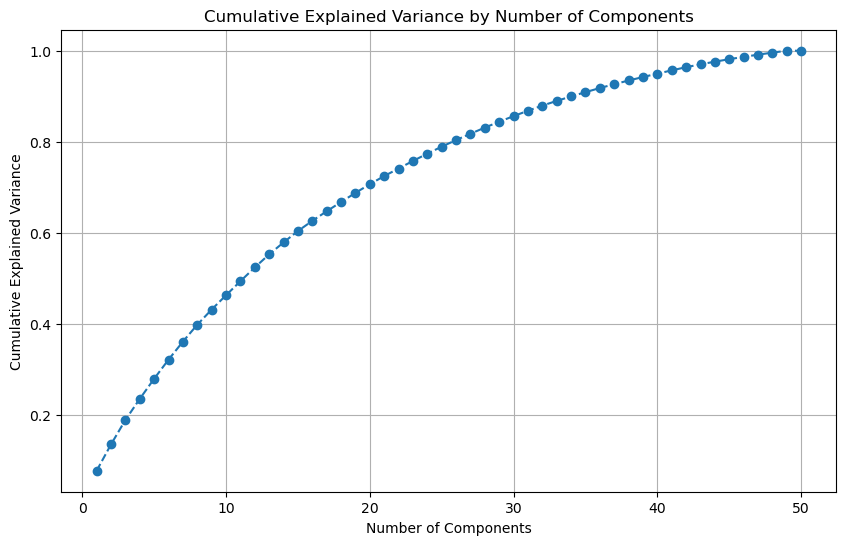

In [11]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [13]:
# Set a threshold (e.g., 95%)
threshold = 0.95

# Find the number of components
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain {threshold*100}% variance: {num_components}")

Number of components to retain 95.0% variance: 41


In [21]:
pca = PCA(n_components=50)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)

### Clustering with k-means

In [22]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

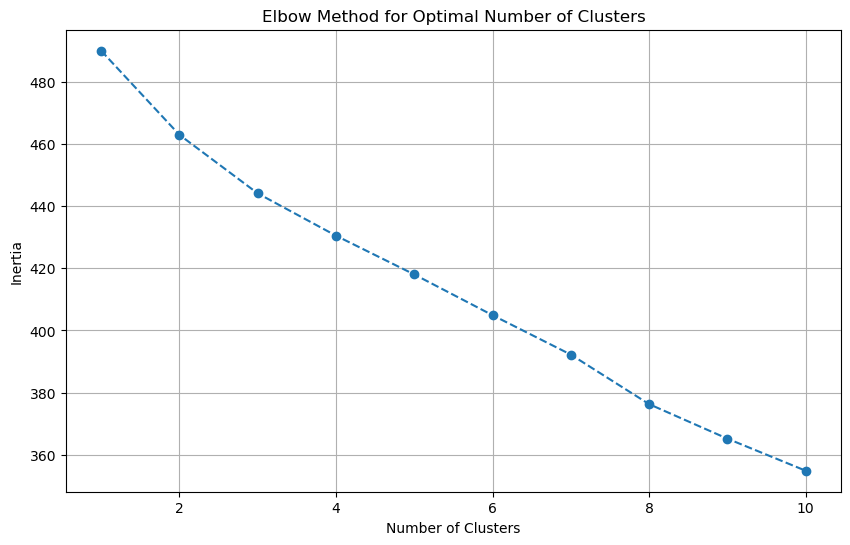

In [25]:
flattened_arrays = [array.flatten() for array in arrays]
# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Test cluster sizes from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(flattened_arrays)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

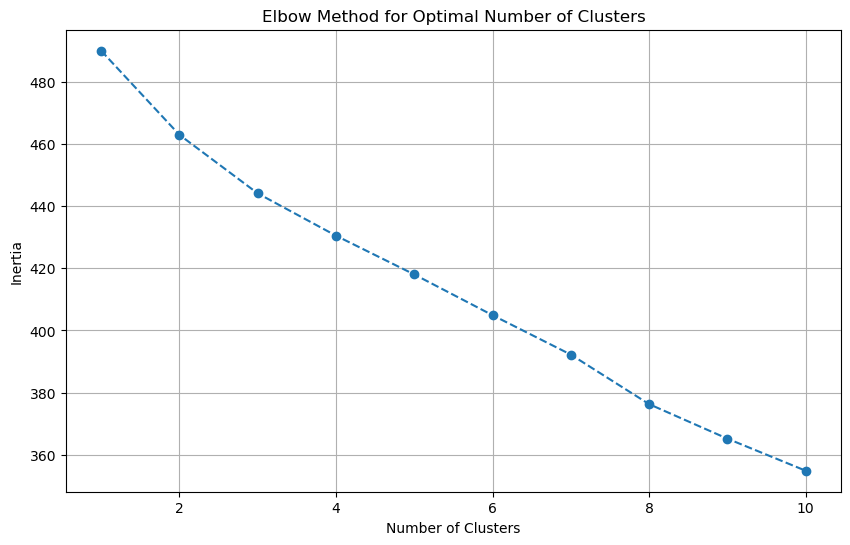

In [24]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Test cluster sizes from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

### Dimensionality reduction with TSNE

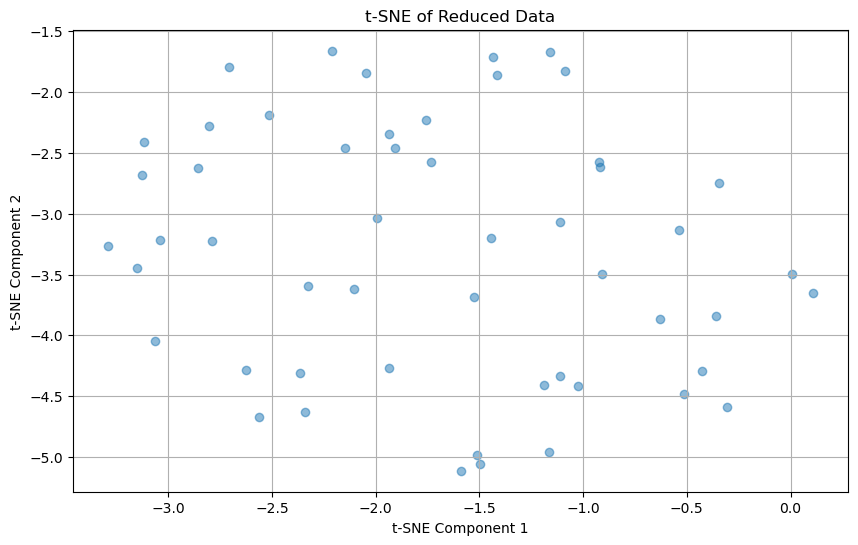

In [17]:
# Reduce dimensionality using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
flattened_ndarray = np.array(flattened_arrays)
reduced_data_tsne = tsne.fit_transform(flattened_ndarray)
# Plot the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], alpha=0.5)
plt.title('t-SNE of Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

### Perform k-means clustering

### Visualize the clustering results

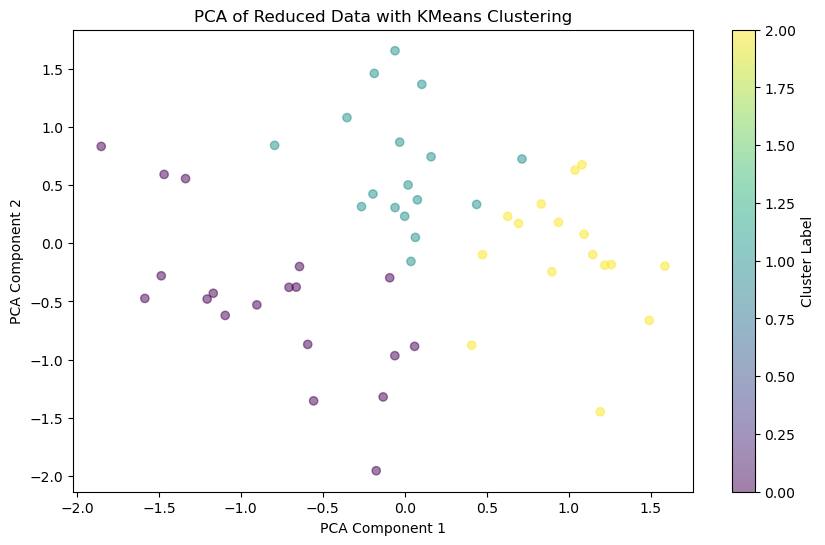

In [20]:
# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('PCA of Reduced Data with KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()